In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=fc77d616a52686f10704701d59704196dbc1407b2a2f1ef1a2faa8dfd7c1c826
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [ ]:
import pandas as pd

import requests
import json

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import streamlit as st
from sklearn.ensemble import RandomForestClassifier
import numpy as np


In [ ]:
NotebookApp.iopub_data_rate_limit=100000000000000000.0

NameError: ignored

In [ ]:
# Make a GET request to the API
url = "https://jhucoronavirus.azureedge.net/api/v1/testing/daily.json"
response = requests.get(url)

# Convert the response content into a DataFrame
data = response.json()

df = pd.DataFrame(data)
df

,date,state,people_viral_positive,tests_viral_positive,tests_viral_negative,encounters_viral_total,tests_viral_total,people_viral_total,tests_combined_total,cases_conf_probable,people_antigen_positive,people_antigen_total,cases_confirmed,cases_probable
0,20200306,AK,NaN,NaN,NaN,NaN,8.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN
1,20200307,AK,NaN,NaN,NaN,NaN,12.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN
2,20200308,AK,NaN,NaN,NaN,NaN,14.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN
3,20200309,AK,NaN,NaN,NaN,NaN,23.0,NaN,23.0,NaN,NaN,NaN,NaN,NaN
4,20200310,AK,NaN,NaN,NaN,NaN,23.0,NaN,23.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36623,20211215,VT,54862.0,NaN,NaN,NaN,2711652.0,559850.0,2711652.0,56661.0,NaN,NaN,54862.0,1799.0
36624,20211215,WA,699633.0,734205.0,10118939.0,9958651.0,NaN,NaN,9958651.0,796369.0,NaN,NaN,699633.0,96736.0
36625,20211215,WI,928112.0,NaN,NaN,12813229.0,NaN,4657288.0,12813229.0,1043693.0,NaN,NaN,928112.0,115581.0
36626,20211215,WV,241479.0,NaN,NaN,NaN,4696447.0,NaN,4765213.0,310245.0,NaN,NaN,241479.0,68766.0


In [ ]:
df.dtypes

date                         int64
state                       object
people_viral_positive      float64
tests_viral_positive       float64
tests_viral_negative       float64
encounters_viral_total     float64
tests_viral_total          float64
people_viral_total         float64
tests_combined_total       float64
cases_conf_probable        float64
people_antigen_positive    float64
people_antigen_total       float64
cases_confirmed            float64
cases_probable             float64
dtype: object

In [ ]:
df.isnull().sum()



date                       0
state                      0
people_viral_positive      0
tests_viral_positive       0
tests_viral_negative       0
encounters_viral_total     0
tests_viral_total          0
people_viral_total         0
tests_combined_total       0
cases_conf_probable        0
people_antigen_positive    0
people_antigen_total       0
cases_confirmed            0
cases_probable             0
dtype: int64

**2 Clean the data by removing any irrelevant columns, null values, or duplicates.**
**3 Pre-process the data by normalizing and scaling the numerical data.**

In [ ]:
#Fill the null values with the median value of each column
df.fillna(df.mean(), inplace=True)
df

<ipython-input-16-f335a0dd43f1>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


,date,state,people_viral_positive,tests_viral_positive,tests_viral_negative,encounters_viral_total,tests_viral_total,people_viral_total,tests_combined_total,cases_conf_probable,people_antigen_positive,people_antigen_total,cases_confirmed,cases_probable
0,20200306,AK,379084.838136,431851.530289,3.823510e+06,6.631937e+06,8.000000e+00,1.737529e+06,8.0,3.855561e+05,64240.545884,412954.091455,625246.255289,66616.499211
1,20200307,AK,379084.838136,431851.530289,3.823510e+06,6.631937e+06,1.200000e+01,1.737529e+06,12.0,3.855561e+05,64240.545884,412954.091455,625246.255289,66616.499211
2,20200308,AK,379084.838136,431851.530289,3.823510e+06,6.631937e+06,1.400000e+01,1.737529e+06,14.0,3.855561e+05,64240.545884,412954.091455,625246.255289,66616.499211
3,20200309,AK,379084.838136,431851.530289,3.823510e+06,6.631937e+06,2.300000e+01,1.737529e+06,23.0,3.855561e+05,64240.545884,412954.091455,625246.255289,66616.499211
4,20200310,AK,379084.838136,431851.530289,3.823510e+06,6.631937e+06,2.300000e+01,1.737529e+06,23.0,3.855561e+05,64240.545884,412954.091455,625246.255289,66616.499211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36623,20211215,VT,54862.000000,431851.530289,3.823510e+06,6.631937e+06,2.711652e+06,5.598500e+05,2711652.0,5.666100e+04,64240.545884,412954.091455,54862.000000,1799.000000
36624,20211215,WA,699633.000000,734205.000000,1.011894e+07,9.958651e+06,5.432242e+06,1.737529e+06,9958651.0,7.963690e+05,64240.545884,412954.091455,699633.000000,96736.000000
36625,20211215,WI,928112.000000,431851.530289,3.823510e+06,1.281323e+07,5.432242e+06,4.657288e+06,12813229.0,1.043693e+06,64240.545884,412954.091455,928112.000000,115581.000000
36626,20211215,WV,241479.000000,431851.530289,3.823510e+06,6.631937e+06,4.696447e+06,1.737529e+06,4765213.0,3.102450e+05,64240.545884,412954.091455,241479.000000,68766.000000


In [ ]:
#check how many null values are in the data set
df.isnull().sum()

date                       0
state                      0
people_viral_positive      0
tests_viral_positive       0
tests_viral_negative       0
encounters_viral_total     0
tests_viral_total          0
people_viral_total         0
tests_combined_total       0
cases_conf_probable        0
people_antigen_positive    0
people_antigen_total       0
cases_confirmed            0
cases_probable             0
dtype: int64

In [ ]:
df.drop_duplicates()

,date,state,people_viral_positive,tests_viral_positive,tests_viral_negative,encounters_viral_total,tests_viral_total,people_viral_total,tests_combined_total,cases_conf_probable,people_antigen_positive,people_antigen_total,cases_confirmed,cases_probable
0,20200306,0,379084.838136,431851.530289,3.823510e+06,6.631937e+06,8.000000e+00,1.737529e+06,8.0,3.855561e+05,64240.545884,412954.091455,625246.255289,66616.499211
1,20200307,0,379084.838136,431851.530289,3.823510e+06,6.631937e+06,1.200000e+01,1.737529e+06,12.0,3.855561e+05,64240.545884,412954.091455,625246.255289,66616.499211
2,20200308,0,379084.838136,431851.530289,3.823510e+06,6.631937e+06,1.400000e+01,1.737529e+06,14.0,3.855561e+05,64240.545884,412954.091455,625246.255289,66616.499211
3,20200309,0,379084.838136,431851.530289,3.823510e+06,6.631937e+06,2.300000e+01,1.737529e+06,23.0,3.855561e+05,64240.545884,412954.091455,625246.255289,66616.499211
4,20200310,0,379084.838136,431851.530289,3.823510e+06,6.631937e+06,2.300000e+01,1.737529e+06,23.0,3.855561e+05,64240.545884,412954.091455,625246.255289,66616.499211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36623,20211215,51,54862.000000,431851.530289,3.823510e+06,6.631937e+06,2.711652e+06,5.598500e+05,2711652.0,5.666100e+04,64240.545884,412954.091455,54862.000000,1799.000000
36624,20211215,52,699633.000000,734205.000000,1.011894e+07,9.958651e+06,5.432242e+06,1.737529e+06,9958651.0,7.963690e+05,64240.545884,412954.091455,699633.000000,96736.000000
36625,20211215,53,928112.000000,431851.530289,3.823510e+06,1.281323e+07,5.432242e+06,4.657288e+06,12813229.0,1.043693e+06,64240.545884,412954.091455,928112.000000,115581.000000
36626,20211215,54,241479.000000,431851.530289,3.823510e+06,6.631937e+06,4.696447e+06,1.737529e+06,4765213.0,3.102450e+05,64240.545884,412954.091455,241479.000000,68766.000000


In [ ]:
#Transform categorical data
from sklearn.preprocessing import LabelEncoder
LabelEncoder
encoder= LabelEncoder()
df['state']= encoder.fit_transform(df['state'])
df

,date,state,people_viral_positive,tests_viral_positive,tests_viral_negative,encounters_viral_total,tests_viral_total,people_viral_total,tests_combined_total,cases_conf_probable,people_antigen_positive,people_antigen_total,cases_confirmed,cases_probable
0,20200306,0,379084.838136,431851.530289,3.823510e+06,6.631937e+06,8.000000e+00,1.737529e+06,8.0,3.855561e+05,64240.545884,412954.091455,625246.255289,66616.499211
1,20200307,0,379084.838136,431851.530289,3.823510e+06,6.631937e+06,1.200000e+01,1.737529e+06,12.0,3.855561e+05,64240.545884,412954.091455,625246.255289,66616.499211
2,20200308,0,379084.838136,431851.530289,3.823510e+06,6.631937e+06,1.400000e+01,1.737529e+06,14.0,3.855561e+05,64240.545884,412954.091455,625246.255289,66616.499211
3,20200309,0,379084.838136,431851.530289,3.823510e+06,6.631937e+06,2.300000e+01,1.737529e+06,23.0,3.855561e+05,64240.545884,412954.091455,625246.255289,66616.499211
4,20200310,0,379084.838136,431851.530289,3.823510e+06,6.631937e+06,2.300000e+01,1.737529e+06,23.0,3.855561e+05,64240.545884,412954.091455,625246.255289,66616.499211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36623,20211215,51,54862.000000,431851.530289,3.823510e+06,6.631937e+06,2.711652e+06,5.598500e+05,2711652.0,5.666100e+04,64240.545884,412954.091455,54862.000000,1799.000000
36624,20211215,52,699633.000000,734205.000000,1.011894e+07,9.958651e+06,5.432242e+06,1.737529e+06,9958651.0,7.963690e+05,64240.545884,412954.091455,699633.000000,96736.000000
36625,20211215,53,928112.000000,431851.530289,3.823510e+06,1.281323e+07,5.432242e+06,4.657288e+06,12813229.0,1.043693e+06,64240.545884,412954.091455,928112.000000,115581.000000
36626,20211215,54,241479.000000,431851.530289,3.823510e+06,6.631937e+06,4.696447e+06,1.737529e+06,4765213.0,3.102450e+05,64240.545884,412954.091455,241479.000000,68766.000000


In [ ]:
df1= df.drop_duplicates(subset=['date','state',	'people_viral_positive',	'tests_viral_positive',	'tests_viral_negative',	'encounters_viral_total',	'tests_viral_total',	'people_viral_total',	'tests_combined_total',	'cases_conf_probable',	'people_antigen_positive',	'people_antigen_total',	'cases_confirmed',	'cases_probable'])
df1

,date,state,people_viral_positive,tests_viral_positive,tests_viral_negative,encounters_viral_total,tests_viral_total,people_viral_total,tests_combined_total,cases_conf_probable,people_antigen_positive,people_antigen_total,cases_confirmed,cases_probable
0,20200306,0,379084.838136,431851.530289,3.823510e+06,6.631937e+06,8.000000e+00,1.737529e+06,8.0,3.855561e+05,64240.545884,412954.091455,625246.255289,66616.499211
1,20200307,0,379084.838136,431851.530289,3.823510e+06,6.631937e+06,1.200000e+01,1.737529e+06,12.0,3.855561e+05,64240.545884,412954.091455,625246.255289,66616.499211
2,20200308,0,379084.838136,431851.530289,3.823510e+06,6.631937e+06,1.400000e+01,1.737529e+06,14.0,3.855561e+05,64240.545884,412954.091455,625246.255289,66616.499211
3,20200309,0,379084.838136,431851.530289,3.823510e+06,6.631937e+06,2.300000e+01,1.737529e+06,23.0,3.855561e+05,64240.545884,412954.091455,625246.255289,66616.499211
4,20200310,0,379084.838136,431851.530289,3.823510e+06,6.631937e+06,2.300000e+01,1.737529e+06,23.0,3.855561e+05,64240.545884,412954.091455,625246.255289,66616.499211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36623,20211215,51,54862.000000,431851.530289,3.823510e+06,6.631937e+06,2.711652e+06,5.598500e+05,2711652.0,5.666100e+04,64240.545884,412954.091455,54862.000000,1799.000000
36624,20211215,52,699633.000000,734205.000000,1.011894e+07,9.958651e+06,5.432242e+06,1.737529e+06,9958651.0,7.963690e+05,64240.545884,412954.091455,699633.000000,96736.000000
36625,20211215,53,928112.000000,431851.530289,3.823510e+06,1.281323e+07,5.432242e+06,4.657288e+06,12813229.0,1.043693e+06,64240.545884,412954.091455,928112.000000,115581.000000
36626,20211215,54,241479.000000,431851.530289,3.823510e+06,6.631937e+06,4.696447e+06,1.737529e+06,4765213.0,3.102450e+05,64240.545884,412954.091455,241479.000000,68766.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36628 entries, 0 to 36627
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     36628 non-null  int64  
 1   state                    36628 non-null  int64  
 2   people_viral_positive    36628 non-null  float64
 3   tests_viral_positive     36628 non-null  float64
 4   tests_viral_negative     36628 non-null  float64
 5   encounters_viral_total   36628 non-null  float64
 6   tests_viral_total        36628 non-null  float64
 7   people_viral_total       36628 non-null  float64
 8   tests_combined_total     36628 non-null  float64
 9   cases_conf_probable      36628 non-null  float64
 10  people_antigen_positive  36628 non-null  float64
 11  people_antigen_total     36628 non-null  float64
 12  cases_confirmed          36628 non-null  float64
 13  cases_probable           36628 non-null  float64
dtypes: float64(12), int64(

**5 Perform EDA to identify trends, correlations, and patterns in the data. Use visualizations such as histograms, scatter plots, and heatmaps to help you understand the data better.**

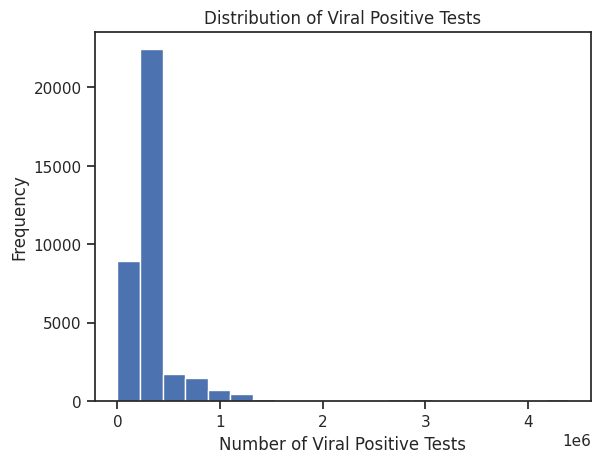

In [ ]:
# Plot a histogram of the 'tests_viral_positive' column
plt.hist(df['tests_viral_positive'], bins=20)
plt.title('Distribution of Viral Positive Tests')
plt.xlabel('Number of Viral Positive Tests')
plt.ylabel('Frequency')
plt.show()

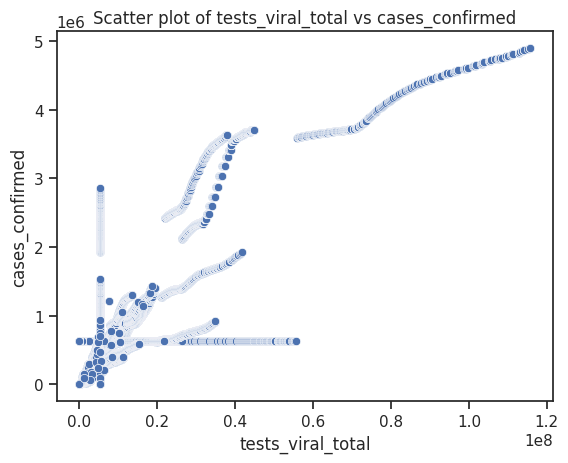

In [ ]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)

# Create scatter plot
sns.scatterplot(x='tests_viral_total', y='cases_confirmed', data=df1)

# Add title and axis labels
plt.title('Scatter plot of tests_viral_total vs cases_confirmed')
plt.xlabel('tests_viral_total')
plt.ylabel('cases_confirmed')

# Display the plot
plt.show()

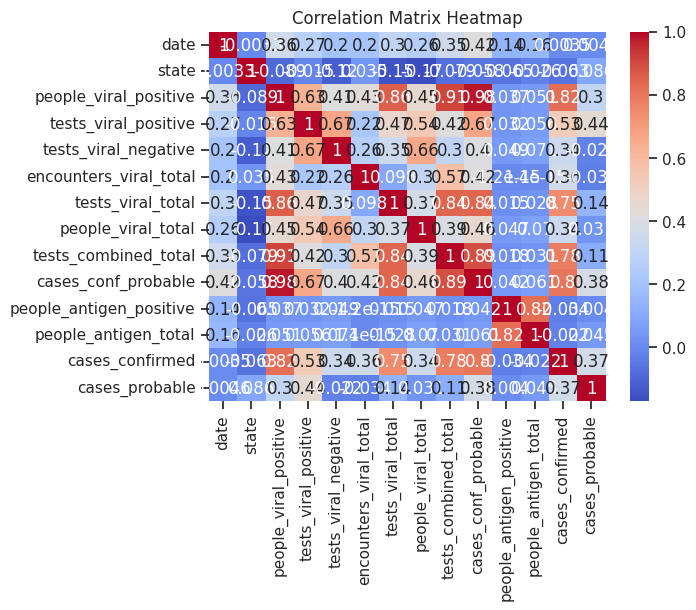

In [ ]:
# Create a correlation matrix of the numerical columns
corr_matrix = df1.corr()

# Create a heatmap of the correlation matrix using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

**6 Choose the best-suited supervised algorithm to predict the future number of cases. Use techniques such as train-test split, cross-validation, and grid search to optimize the model's performance.**

In [ ]:
# Load the iris dataset
X = df1.drop(columns=['cases_probable'])
y = df1['cases_probable']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=9)

In [ ]:
import joblib
# Train the model
reg = LinearRegression().fit(X_train, y_train)

# Predict on the testing set
y_pred = reg.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

joblib.dump(reg,"covid.pkl")

Mean Squared Error: 1440661161.4755287
Root Mean Squared Error: 37956.04248964226
R-squared: 0.6342350564687897


['covid.pkl']

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
